<a href="https://colab.research.google.com/github/hisics/-datawhisperers_final-project_dsml2021/blob/sushma/datawhisperers_sentiment_analysis_amazon_apparel_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Capstone Project - ML on Apparel Reviews at Amazon US
The Data Whisperers Team ✨  Amba | Bhavya | Sushma | Heba

#### Chosen project : Option 8 - Sentiment Analysis for Ecommerce | Apparel
---



<b>Objectives</b>
- Product owner's perspective: 
  - Quality improvement |
  - Gap analysis | same product different maker?
  - Reputation management
- Investor's perspective: 
  - which product owners improve over time
- Consumer perspective
  - Influencial posts

- ML Practice | Inferrential analysis for positive or negative feedback on products in social media product  


---
Notes: 
* #todo : means to check or come back to the code
* #NOTE : is a reminder or notice 

<b>Understanding the Dataset</b>

* marketplace       : 2 letter country code of the marketplace where the review was written.
*customer_id       : Random identifier that can be used to aggregate *reviews written by a single author.
*review_id         : The unique ID of the review.
*product_id        : The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.
*product_parent    : Random identifier (can be used to aggregatereviews for the same product).
*product_title     : Title of the product.
*product_category  : Broad product category.
*star_rating       : The 1-5 star rating of the review.
*helpful_votes     : Number of helpful votes.
*total_votes       : Number of total votes the review received.
*vine              : Review was written as part of the Vine program.
*verified_purchase : The review is on a verified purchase.
*review_headline   : The title of the review.
*review_body       : The review text.
*review_date       : The date the review was written.

From Dany: Look at this document for reference,<br/>
https://colab.research.google.com/drive/1g6ZtYOOhGUj1WsiPpeaVPp5T7VFw234e?usp=sharing

https://www.tensorflow.org/datasets/catalog/amazon_us_reviews

#### Importing libaries and Apparel dataset

In [ ]:
# (1) Import libraries
import pandas as pd
import numpy as np
from distutils.util import strtobool


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# for basic visualizations
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

import datetime

In [ ]:
# (2) Download product reviews from Amazon Datasets
# You can use reviews from Amazon Datasets for a particular product.
# Note that the data are quite large so do not run this cell unless you are willing to wait!
# For reference, visit:
# https://www.tensorflow.org/datasets/catalog/amazon_us_reviews
# https://s3.amazonaws.com/amazon-reviews-pds/readme.html
!curl -O https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  618M  100  618M    0     0  14.0M      0  0:00:44  0:00:44 --:--:-- 15.1M


In [ ]:
!echo "y" | gzip -d amazon_reviews_us_Apparel_v1_00.tsv.gz

gzip: amazon_reviews_us_Apparel_v1_00.tsv already exists;	not overwritten


In [ ]:
# (3.a) Read the contents of the folder 
!ls

amazon_reviews_us_Apparel_v1_00.tsv	Emoticon_Dict.p
amazon_reviews_us_Apparel_v1_00.tsv.gz	sample_data
cleaned_text_apparel_dataset.csv


In [ ]:
# (3.b) Explore data (see what is categorial and numerical)

In [ ]:
df = pd.read_table('amazon_reviews_us_Apparel_v1_00.tsv', delim_whitespace=False, error_bad_lines=False, nrows=100000)
df.info()

b'Skipping line 49396: expected 15 fields, saw 22\nSkipping line 57008: expected 15 fields, saw 22\n'
b'Skipping line 82075: expected 15 fields, saw 22\n'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        100000 non-null  object
 1   customer_id        100000 non-null  int64 
 2   review_id          100000 non-null  object
 3   product_id         100000 non-null  object
 4   product_parent     100000 non-null  int64 
 5   product_title      100000 non-null  object
 6   product_category   100000 non-null  object
 7   star_rating        100000 non-null  int64 
 8   helpful_votes      100000 non-null  int64 
 9   total_votes        100000 non-null  int64 
 10  vine               100000 non-null  object
 11  verified_purchase  100000 non-null  object
 12  review_headline    100000 non-null  object
 13  review_body        99947 non-null   object
 14  review_date        99997 non-null   object
dtypes: int64(5), object(10)
memory usage: 11.4+ MB


In [ ]:
# To see how the data looks like and if any is boolean
df.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
99995,US,43330569,R209JPXL8VMOVJ,B00VW37AMU,354148485,"Cybertela Women's Nice Fish You Caught, Can.. ...",Apparel,5,0,0,N,Y,Five Stars,My girlfriend loved it.,2015-05-05
99996,US,25578439,R2ISQWVCXLRNXQ,B00VW367FG,90102146,Cybertela Women's If You Don’t Fish I See.. Fu...,Apparel,4,0,0,N,Y,Four Stars,Great shirt,2015-05-18
99997,US,4282714,RB6XI6R464ZQL,B00VW366V6,789256548,Asgard Blacksmith's Alliance Thor Men's T-Shirt,Apparel,5,0,0,N,Y,Five Stars,Sweet shirt,2015-06-29
99998,US,41294636,R2RW7ZCM8J5YGV,B00VW2UKTG,233863271,Naturana Women's Mastectomy Bra,Apparel,5,0,1,N,Y,Five Stars,very well made,2015-08-06
99999,US,10624669,RN6BUHLG6XC8U,B00VW2TT0W,255023016,Ah Pardon Me My Good Sir I Believe I May Have ...,Apparel,4,0,0,N,Y,So Great!,This was a hit at the baby shower!,2015-07-07


###Cleaning data and converting data types


#### Pre-processing the columns without review text

In [ ]:
## If reading from cleaned csv 
import pandas as pd
df = pd.read_csv('./cleaned_text_apparel_dataset.csv',index_col=0)

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99944 entries, 0 to 99943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        99944 non-null  int64         
 1   product_id         99944 non-null  object        
 2   product_parent     99944 non-null  int64         
 3   product_title      99944 non-null  object        
 4   star_rating        99944 non-null  int64         
 5   helpful_votes      99944 non-null  int64         
 6   total_votes        99944 non-null  int64         
 7   vine               99944 non-null  int64         
 8   verified_purchase  99944 non-null  int64         
 9   review_body        99944 non-null  object        
 10  review_date        99944 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 9.2+ MB


In [ ]:
# Checking if marketplace is only in the US
df.head(5)

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_body,review_date
0,32158956,B01KL6O72Y,24485154,easy tool stainless steel fruit pineapple core...,4,0,0,0,1,these really do work great with some tweaking...,2013-01-14
1,2714559,B01ID3ZS5W,363128556,v women cowl neck knit stretchable elasticity ...,5,1,2,0,1,favorite for winter very warm i love this dres...,2014-03-04
2,12608825,B01I497BGY,811958549,james fiallo men's -pairs low cut athletic spo...,5,0,0,0,1,great socks for the money nice socks great col...,2015-07-12
3,25482800,B01HDXFZK6,692205728,belfry gangster % wool stain-resistant crushab...,5,0,0,0,1,slick hat i bought this for my husband and wow...,2015-06-03
4,9310286,B01G6MBEBY,431150422,jaeden women's beaded spaghetti straps sexy lo...,5,0,0,0,1,i would do it again perfect dress and the cust...,2015-06-12


In [ ]:
# Checking unique values of each row in all columns
n = df.nunique(axis=0)
print(
    "Total number of rows in this data set is:{}\nNumber of unique values in each column for in this dataset is:\n"
    .format(len(df)), n)
# outcome --> drop marketplace-category-reviewID
# outcome --> bool vine verified purchase

Total number of rows in this data set is:99944
Number of unique values in each column for in this dataset is:
 customer_id          85101
product_id           66200
product_parent       41066
product_title        39218
star_rating              5
helpful_votes          205
total_votes            214
vine                     2
verified_purchase        2
review_body          92125
review_date            173
dtype: int64


In [ ]:
# Cleaning
# (1) Drop irrelevant info: marketplace + product_category + review_id
df.drop(['marketplace','product_category','review_id'], axis=1, inplace=True)

# (2) Map: vine + verified_purchase (y:1, n:0)
YN_to_bool = {'Y': 1,'N': 0}
df['vine'] = df['vine'].map( YN_to_bool )
df['verified_purchase'] = df['verified_purchase'].map( YN_to_bool)

# (3) Datetime: review_date
df['review_date'] = pd.to_datetime(df['review_date'])
 
# (4) Create a year column for EDA
df['Year'] = df.review_date.dt.year

# (5) Drop the rows where there are no reviews and no review dates
df.dropna(subset = ['review_body'], inplace = True)
df.dropna(subset = ['review_date'], inplace = True)

# (6) Combine the review headline and review date columns
df['review_body'] = df['review_headline'] + ' ' + df['review_body']
del df['review_headline']

# (7) Changing review_body to string & adding a length column for analyzing the length of the reviews
df['review_body']= df['review_body'].apply(str)
df['length'] = df['review_body'].map(str).apply(len)

# (9) Print to see the null rows if any
null_columns=df.columns[df.isnull().any()]
df[df["review_date"].isnull()] #[null_columns] add to tail end to show null columns when that particular colum is null

df.head(1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99944 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        99944 non-null  int64         
 1   product_id         99944 non-null  object        
 2   product_parent     99944 non-null  int64         
 3   product_title      99944 non-null  object        
 4   star_rating        99944 non-null  int64         
 5   helpful_votes      99944 non-null  int64         
 6   total_votes        99944 non-null  int64         
 7   vine               99944 non-null  int64         
 8   verified_purchase  99944 non-null  int64         
 9   review_body        99944 non-null  object        
 10  review_date        99944 non-null  datetime64[ns]
 11  Year               99944 non-null  float64       
 12  length             99944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(3)
memory 

In [ ]:
df = df.reset_index()

#### Pre-processing the text fields
##### Useful resource for cleaning text
https://medium.com/mlearning-ai/10-python-functions-you-need-to-apply-before-you-build-your-nlp-sentiment-analysis-model-874a37e0217e



In [ ]:
# to show full text
# pd.options.display.max_rows
# pd.set_option('display.max_colwidth', None)

In [ ]:
# show then count text with emojis
sad_emoji = df.review_body[df['review_body'].str.contains("😠|😔")].count()
happy_loved_emoji = df.review_body[df['review_body'].str.contains("😊|❤️")].count()
thumbs_up_down_emoji = df.review_body[df['review_body'].str.contains("👍|👎")].count()
happy_emoticon = df.review_body[df['review_body'].str.contains(":\)|:D")].count()
sad_emoticon = df.review_body[df['review_body'].str.contains(":\(")].count()

print("Count of dissapointed or angry emoji's 😠 or 😔: \n{}".format(sad_emoji))
print("Count of happy or heart emoji's 😊 or ❤️: \n{}".format(happy_loved_emoji))
print("Count of thumbs up or down emoji's 👍 or 👎: \n{}".format(thumbs_up_down_emoji))
print("Count of happy emoticon :) or :D : \n{}".format(happy_emoticon))
print("Count of sad emoticon :( : \n{}".format(sad_emoticon))

Count of dissapointed or angry emoji's 😠 or 😔: 
0
Count of happy or heart emoji's 😊 or ❤️: 
0
Count of thumbs up or down emoji's 👍 or 👎: 
0
Count of happy emoticon :) or :D : 
0
Count of sad emoticon :( : 
0


In [ ]:
# clean <br /> from text ; the html break line 
print(df.review_body[df['review_body'].str.contains("<br />")].count())

0


In [ ]:
# clean <br /> from text
import re
def remove_HtmlBreak(text):
  text = re.sub("<br />","", text)
  return text

df['review_body'] = df.apply(lambda row: remove_HtmlBreak(row['review_body']), axis=1)
print(df.review_body[df['review_body'].str.contains("<br />")].count())

0


In [ ]:
# Function to convert emojis to word
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI

def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

##################################################################
# Function to convert emoticons to word 
#Note remember to upload emoticon dict 
import re
try:
    import cPickle as pickle
except ImportError:
    import pickle  

with open('Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)

def convert_emoticons(text):
   for emot in Emoticon_Dict:
        text = re.sub(u'('+emot+')', "_".join(Emoticon_Dict[emot].replace(",","").split()), text)
   return text

FileNotFoundError: ignored

In [ ]:
# Apply the convert emoji and emoticons functions to review body
#NOTE converting emojis to word function takes a whole lot of time ~ 1hour 35 mins mins for 100K reviews | changed code slightly to take under 5 mins
df['review_body'] = df['review_body'].apply(convert_emojis)

In [ ]:
# df['review_body'] = df['review_body'].apply(lambda row: convert_emoticons(row['review_body']), axis=1)
df['review_body'] = df['review_body'].apply(convert_emoticons)

In [ ]:
# checking if emojis and emoticons removed
# df.review_body[df['review_body'].str.contains(":\)|:D")].count()

sad_emoji = df.review_body[df['review_body'].str.contains("😠|😔")].count()
happy_loved_emoji = df.review_body[df['review_body'].str.contains("😊|❤️")].count()
thumbs_up_down_emoji = df.review_body[df['review_body'].str.contains("👍|👎")].count()
happy_emoticon = df.review_body[df['review_body'].str.contains(":\)|:D")].count()
sad_emoticon = df.review_body[df['review_body'].str.contains(":\(")].count()

print("Count of dissapointed or angry emoji's 😠 or 😔: \n{}".format(sad_emoji))
print("Count of happy or heart emoji's 😊 or ❤️: \n{}".format(happy_loved_emoji))
print("Count of thumbs up or down emoji's 👍 or 👎: \n{}".format(thumbs_up_down_emoji))
print("Count of happy emoticon :) or :D : \n{}".format(happy_emoticon))
print("Count of sad emoticon :( : \n{}".format(sad_emoticon))

# For some reason, 1 emitocon was not replaced, applied code below to make sure it's updated
# df.review_body[df['review_body'].str.contains(":\(")] = df.review_body[df['review_body'].str.contains(":\(")].apply(convert_emoticons)


Count of dissapointed or angry emoji's 😠 or 😔: 
0
Count of happy or heart emoji's 😊 or ❤️: 
0
Count of thumbs up or down emoji's 👍 or 👎: 
0
Count of happy emoticon :) or :D : 
0
Count of sad emoticon :( : 
0


In [ ]:
# Removing the hashtags
import re      # Import REGEX
def remove_mentions(text):
  text = re.sub("@[A-Za-z0-9_]+","", text)
  text = re.sub("#[A-Za-z0-9_]+","", text)
  return text

df['review_body'] = df.apply(lambda row: remove_mentions(row['review_body']), axis=1)

In [ ]:
# Importing text cleaning libraries 
# Tokenizer: Tokenization of data. At one stage we will need to deal with our text as a words list to iterate between the words and apply certain functions on it

import nltk         #Natural language processing tool-kit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# lower all upper case and enumerate words into a list
df['review_body'] = df['review_body'].str.lower()
df['product_title'] = df['product_title'].str.lower()
df['product_title']

0        easy tool stainless steel fruit pineapple core...
1        v women cowl neck knit stretchable elasticity ...
2        james fiallo men's -pairs low cut athletic spo...
3        belfry gangster % wool stain-resistant crushab...
4        jaeden women's beaded spaghetti straps sexy lo...
                               ...                        
99939    cybertela women's nice fish you caught, can.. ...
99940    cybertela women's if you dont fish i see.. fun...
99941      asgard blacksmith's alliance thor men's t-shirt
99942                      naturana women's mastectomy bra
99943    ah pardon me my good sir i believe i may have ...
Name: product_title, Length: 99944, dtype: object

In [ ]:
# Removal of numbers and digits
import re      # Import REGEX
def remove_numbers(text):
  text = re.sub(r'\d+', '', str(text))
  return text

df['review_body'] = df['review_body'].apply(remove_numbers)
df['product_title'] = df['product_title'].apply(remove_numbers)

In [ ]:
# Removal of special characters
import re, string, unicodedata # Import Regex, string and unicodedata.
def remove_non_ascii(words):
    words = unicodedata.normalize('NFKD', words).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return words

df['review_body'] = df['review_body'].apply(remove_non_ascii)
df['product_title'] = df['product_title'].apply(remove_non_ascii)

In [ ]:
# Removing punctuations in string
import re      # Import REGEX
def remov_punc(text):
  text = re.sub(r'[^\w\s]', '', str(text))
  return text
df['review_body'] = df['review_body'].apply(remov_punc)

In [ ]:
df.drop(['index','Year','length'],axis = 1,inplace = True)
df.info()

In [ ]:
# Export cleaned to CSV for faster operation?
# df.to_csv('./cleaned_text_apparel_dataset.csv')

In [ ]:
print(df['review_body'])

0         these really do work great with some tweaking...
1        favorite for winter very warm i love this dres...
2        great socks for the money nice socks great col...
3        slick hat i bought this for my husband and wow...
4        i would do it again perfect dress and the cust...
                               ...                        
99939                    five stars my girlfriend loved it
99940                               four stars great shirt
99941                               five stars sweet shirt
99942                            five stars very well made
99943           so great this was a hit at the baby shower
Name: review_body, Length: 99944, dtype: object


In [ ]:
# (5) Drop the rows where there are no reviews and no review dates
df.dropna(subset = ['review_body'], inplace = True)
df.dropna(subset = ['review_date'], inplace = True)

In [ ]:
df['review_body'] = df.apply(lambda row: remove_mentions(row['review_body']), axis=1)

In [ ]:
df['product_title'] = df.apply(lambda row: remove_mentions(row['product_title']), axis=1)

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
df['review_body'] = df['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_body,review_date
0,32158956,B01KL6O72Y,24485154,easy tool stainless steel fruit pineapple core...,4,0,0,0,1,really work great tweaking really work great b...,2013-01-14
1,2714559,B01ID3ZS5W,363128556,v women cowl neck knit stretchable elasticity ...,5,1,2,0,1,favorite winter warm love dress absolute favor...,2014-03-04
2,12608825,B01I497BGY,811958549,james fiallo men's -pairs low cut athletic spo...,5,0,0,0,1,great socks money nice socks great colors enou...,2015-07-12
3,25482800,B01HDXFZK6,692205728,belfry gangster % wool stain-resistant crushab...,5,0,0,0,1,slick hat bought husband wow slick hat high qu...,2015-06-03
4,9310286,B01G6MBEBY,431150422,jaeden women's beaded spaghetti straps sexy lo...,5,0,0,0,1,would perfect dress customer service awesome,2015-06-12


In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['review_body'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)   

### EDA and Feature Engineering

In [ ]:
## If reading from cleaned csv 
import pandas as pd
df = pd.read_csv('./cleaned_text_apparel_dataset.csv',index_col=0)

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11529 entries, 0 to 11528
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         11529 non-null  int64         
 1   customer_id        11529 non-null  int64         
 2   product_id         11529 non-null  object        
 3   product_parent     11529 non-null  int64         
 4   product_title      11529 non-null  object        
 5   star_rating        11529 non-null  float64       
 6   helpful_votes      11529 non-null  float64       
 7   total_votes        11529 non-null  float64       
 8   vine               11529 non-null  float64       
 9   verified_purchase  11529 non-null  float64       
 10  review_body        11529 non-null  object        
 11  review_date        11529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
# Quick check: Using discriptive statistics + measures of dispersion
# Note: customer_id and product_parent are random numbers not for descriptive analysis
df_discriptive = df.drop(['customer_id', 'product_parent'],axis = 1,inplace = False)
df_discriptive.describe()

# Creating numerical df -> df_num for EDA
# Creating categorical df -> df_cat
cat_list = ['product_parent','product_id','customer_id','product_title','review_body']

df_num = df.drop(cat_list, inplace = False , axis = 1) 
df_cat = df[cat_list]

# df.drop(['level_0','index','year'],inplace=True).info()
df_num.info()
df_cat.info()
df_discriptive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11529 entries, 0 to 11528
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         11529 non-null  int64         
 1   star_rating        11529 non-null  float64       
 2   helpful_votes      11529 non-null  float64       
 3   total_votes        11529 non-null  float64       
 4   vine               11529 non-null  float64       
 5   verified_purchase  11529 non-null  float64       
 6   review_date        11529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 720.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11529 entries, 0 to 11528
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_parent  11529 non-null  int64 
 1   product_id      11529 non-null  object
 2   customer_id     11529 non-null  int64

In [ ]:
# Discriptive statistics + measures of dispersion by length #ToAskTeam
# df.groupby('length').describe().sample(10)

In [ ]:
df_num.groupby('star_rating').describe()
# df_num

Unnamed: 0                                  ... verified_purchase               
                 count         mean          std   min  ...               25%  50%  75%  max
star_rating                                             ...                                 
1.0             1247.0  5985.464314  3272.882425  19.0  ...               1.0  1.0  1.0  1.0
2.0              665.0  6175.818045  3293.710004  18.0  ...               1.0  1.0  1.0  1.0
3.0              969.0  6327.594427  3224.677546   9.0  ...               1.0  1.0  1.0  1.0
4.0             1843.0  5966.186652  3278.465040   0.0  ...               1.0  1.0  1.0  1.0
5.0             6805.0  5548.161940  3351.191767   1.0  ...               0.0  1.0  1.0  1.0

[5 rows x 40 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



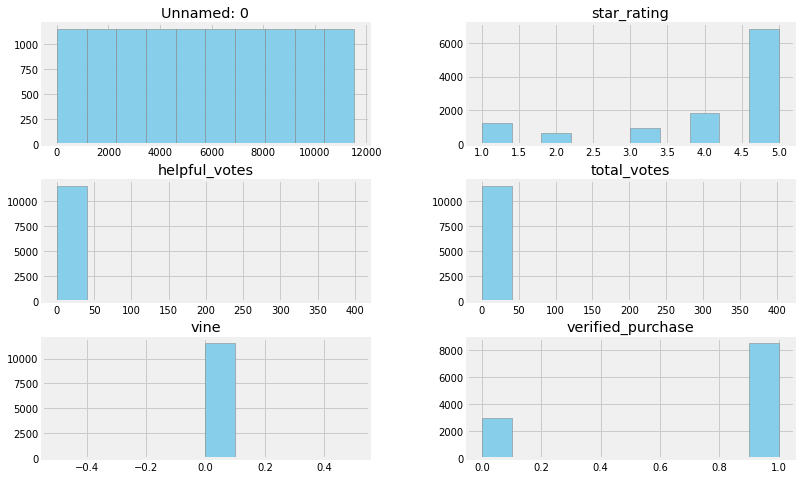

In [ ]:
# Check the distribution of the star rating with the DataFrame | reference chart: https://www.datacamp.com/community/tutorials/histograms-matplotlib
# plt.hist(df.star_rating, bins='auto', color = "skyblue", ec='grey')
# plt.gca().set(title='Frequency Histogram | Review Stars |', ylabel='Frequency',xlabel = 'stars',alpha=0.7, rwidth=0.85);
# plt.show()

fig = plt.figure(figsize = (12,8))
ax = fig.gca()
df_discriptive.hist(ax=ax, color = "skyblue", ec='grey')
plt.show()

# Clustering per groups of product parent | votes per product parent | top 10 ~ 30 products (purchased) | sentiment analysis 
# Sentimet (from -ve) most common words for improvement | from (+ve) most common words for gap analysis



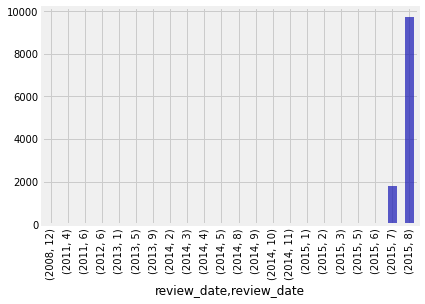

In [ ]:
# Looking at year and month for review | seems we can extra clean outliers outside 2015 #todo
df['star_rating'].groupby([df["review_date"].dt.year,df["review_date"].dt.month]).count().plot(kind="bar",color = ('#1c1cb7b8'))

In [ ]:
# Looking at year and month for review | seems we can extra clean outliers outside 2015 #todo

# only 24 from ~100K reviews in 2014, seems cleaner if we neglect this data
# df[df['review_date']<datetime.datetime(2015,1,1)].count()

df = df[df['review_date']>datetime.datetime(2015,1,1)]
df = df.reset_index()

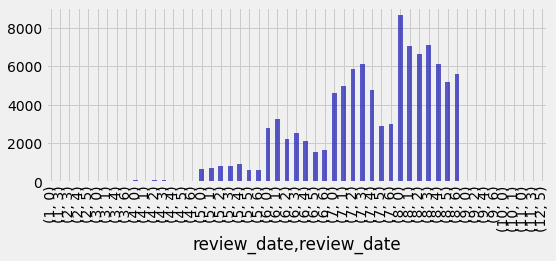

In [ ]:
# Looking at year and month for review after cleaning year
df['review_date'] = pd.to_datetime(df['review_date'])
df['star_rating'].groupby([df["review_date"].dt.month,df["review_date"].dt.weekday]).count().plot(kind="bar",figsize=(8,3),color = ('#1c1cb7b8'))
# df.groupby([df["review_date"].dt.month,df["review_date"].dt.day]).count().plot(kind="bar")

# from IPython.display import HTML
# import plotly.express as px

# fig = px.bar(df, y=df['star_rating'].count(), x='review_date')
# fig.show()

# HTML(fig.to_html())

640132942    303
711375628    294
115644976    232
592779351    165
666588098    156
183888896    145
822230578    143
352290767    143
131053049    134
331176635    127
Name: product_parent, dtype: int64


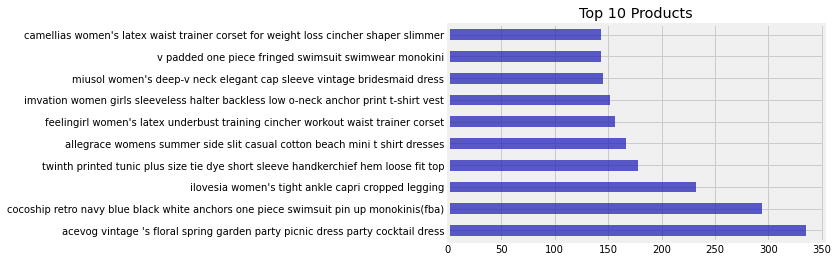

In [ ]:
# Let's look at top viewed products & see over time their reviews to see fake vs not fake 
df['product_parent'] = df['product_parent'].astype(str)
products = df["product_parent"].value_counts()
print(products[0:10])
# products = df["product_title"].value_counts()
# products[0:10]

df["product_title"].value_counts()[:10].plot(kind='barh',title = 'Top 10 Products',color = ('#1c1cb7b8'))

In [ ]:

top10 = products[0:10].index.to_list()
print(top10)

filtered_df = df[df['product_parent'].isin(top10)]
filtered_df

['203771527', '15858790', '382214752', '934238969', '940723486', '457771589', '824375602', '11485117', '946412375', '593388518']


,index,Unnamed: 0,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_body,review_date
449,464,464,10033040,B013MKPBBM,11485117,fresh tees black and white tuxedo with bowtie ...,5.0,0.0,0.0,0.0,0.0,shirt good quality material thick cotton shirt...,2015-08-27
450,465,465,51854170,B013MKPBA8,11485117,fresh tees black and white tuxedo with bowtie ...,3.0,0.0,0.0,0.0,0.0,works almost see fabric shrunk washed but get ...,2015-08-28
451,466,466,10577426,B013MK0KE0,11485117,fresh tees black and white tuxedo with bowtie ...,5.0,0.0,0.0,0.0,0.0,fun shirt material little heavier expecting bu...,2015-08-18
452,467,467,24986716,B013MK0KE0,11485117,fresh tees black and white tuxedo with bowtie ...,5.0,0.0,0.0,0.0,0.0,awesome funny tshirt bought son loves arrived ...,2015-08-23
453,468,468,30762309,B013MK0KE0,11485117,fresh tees black and white tuxedo with bowtie ...,5.0,0.0,0.0,0.0,0.0,nice really nice tshirt price tag tears off ea...,2015-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,11129,11129,12550472,B010H4XE5G,457771589,allegrace womens sleeveless sexy bodycon midi ...,4.0,1.0,1.0,0.0,1.0,fits pear shaped body nicely good amount stret...,2015-08-30
11111,11130,11130,1074767,B010H4XE5G,457771589,allegrace womens sleeveless sexy bodycon midi ...,4.0,0.0,0.0,0.0,1.0,sexy wish came colors love,2015-08-24
11112,11131,11131,10120154,B010H4XE5G,457771589,allegrace womens sleeveless sexy bodycon midi ...,5.0,0.0,0.0,0.0,1.0,great dress dress looks great wrap front hides...,2015-08-20
11113,11132,11132,3246835,B010H4XE5G,457771589,allegrace womens sleeveless sexy bodycon midi ...,4.0,0.0,0.0,0.0,1.0,item came super super fast item came super sup...,2015-08-21


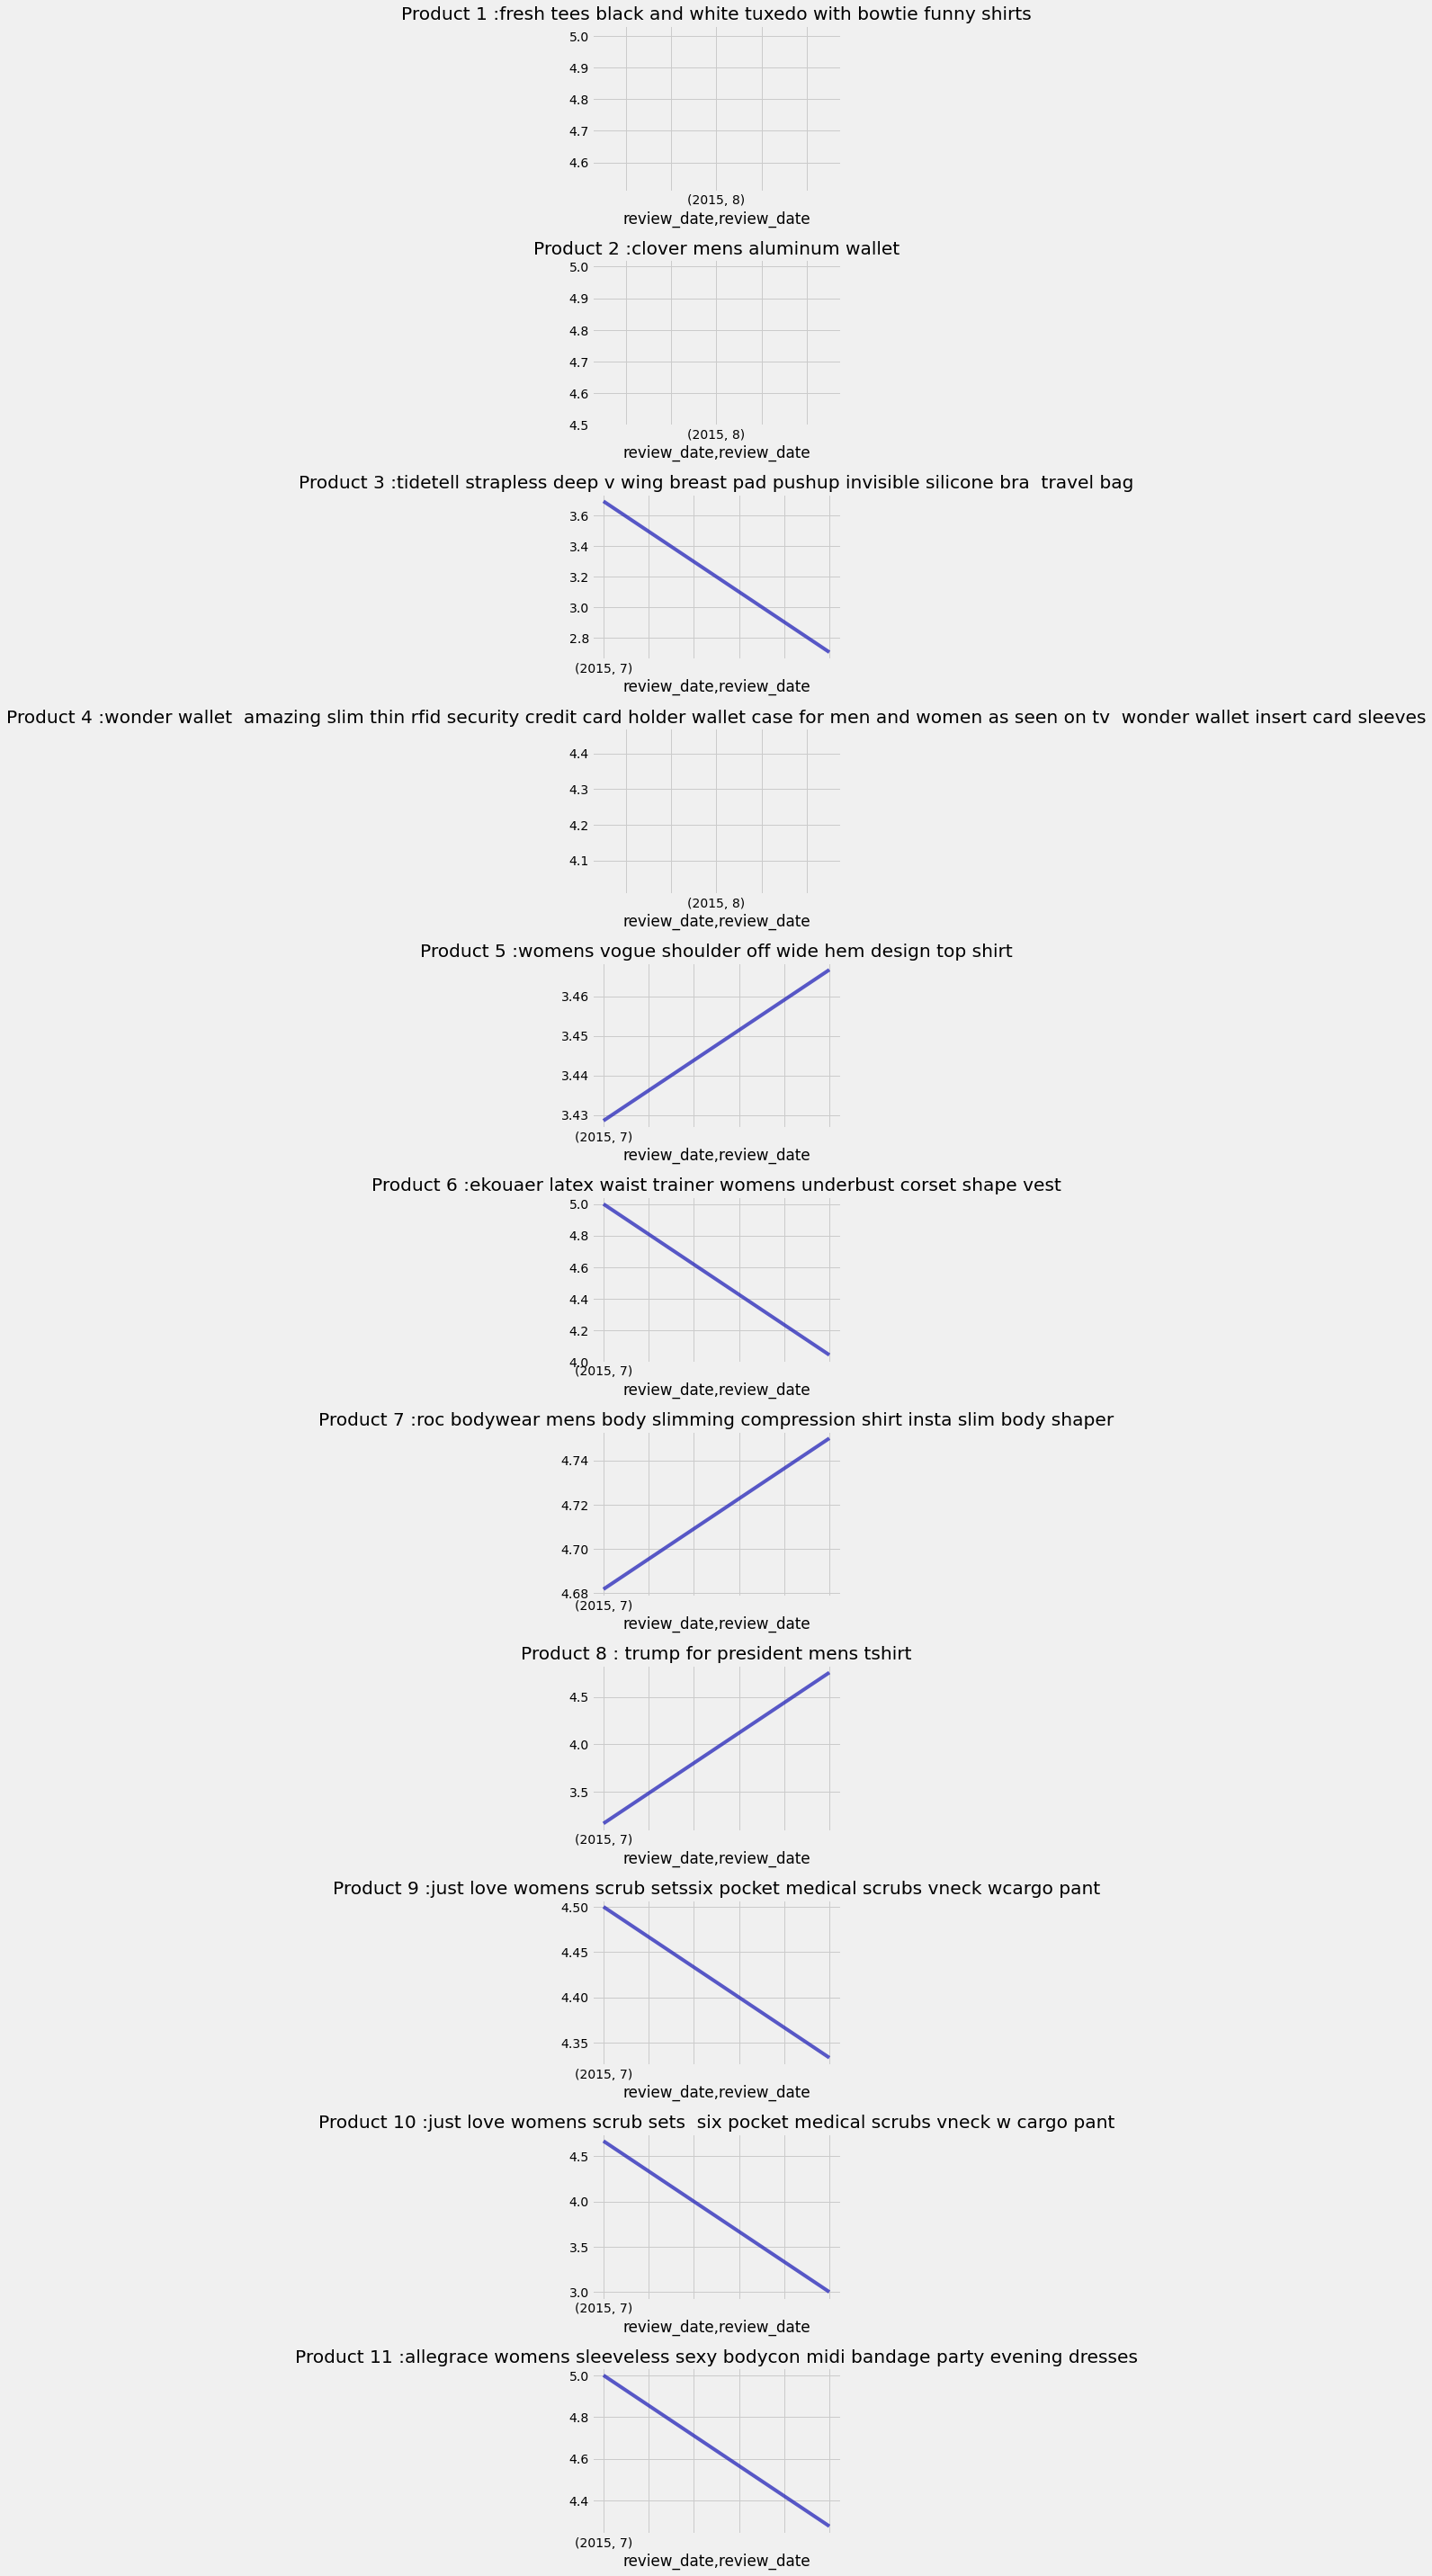

In [ ]:
products10 = filtered_df['product_title'].unique()
fig, axes = plt.subplots(len(products10),figsize=(14,40)) 
count=0
for product, ax in zip(products10, axes):
    # filtered_df[filtered_df['product_title']== product].groupby(filtered_df['review_date'].dt.isocalendar().week).mean()['star_rating'].plot(ax=ax,color = ('#1c1cb7b8'),kind = 'bar')
    filtered_df[filtered_df['product_title']== product].groupby([filtered_df["review_date"].dt.year,filtered_df["review_date"].dt.month]).mean()['star_rating'].plot(ax=ax,color = ('#1c1cb7b8'))
    count += 1
    ax.set_title("Product {} :".format(count) + product)
    # ax.set_ylim([0, 5])

plt.tight_layout()

In [ ]:
def sentiment(row):
    
    '''This function returns sentiment value based on the star_rating from the user'''
    
    if row['star_rating'] == 3.0:
        val = 'Neutral'
    elif row['star_rating'] == 1.0 or row['star_rating'] == 2.0:
        val = 'Negative'
    elif row['star_rating'] == 4.0 or row['star_rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

##### Word cloud for most Reviewed Product: acevog vintage 's floral spring gar
  df

en party picnic dress party cocktail dress

In [ ]:
def sentiment(row):
    
    '''This function returns sentiment value based on the star_rating from the user'''
    
    if row['star_rating'] == 3.0:
        val = 'Neutral'
    elif row['star_rating'] == 1.0 or row['star_rating'] == 2.0:
        val = 'Negative'
    elif row['star_rating'] == 4.0 or row['star_rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
df['sentiment'] = df.apply(sentiment, axis=1)
df.head()

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_body,review_date,text_word_count,sentiment
0,32158956,B01KL6O72Y,24485154,easy tool stainless steel fruit pineapple core...,4,0,0,0,1,really work great tweaking really work great b...,2013-01-14,1872,Positive
1,2714559,B01ID3ZS5W,363128556,v women cowl neck knit stretchable elasticity ...,5,1,2,0,1,favorite winter warm love dress absolute favor...,2014-03-04,267,Positive
2,12608825,B01I497BGY,811958549,james fiallo men's -pairs low cut athletic spo...,5,0,0,0,1,great socks money nice socks great colors enou...,2015-07-12,83,Positive
3,25482800,B01HDXFZK6,692205728,belfry gangster % wool stain-resistant crushab...,5,0,0,0,1,slick hat bought husband wow slick hat high qu...,2015-06-03,136,Positive
4,9310286,B01G6MBEBY,431150422,jaeden women's beaded spaghetti straps sexy lo...,5,0,0,0,1,would perfect dress customer service awesome,2015-06-12,44,Positive


In [ ]:
df['product_title'].value_counts()

acevog vintage 's floral spring garden party picnic dress party cocktail dress           335
cocoship retro navy blue black white anchors one piece swimsuit pin up monokinis(fba)    294
ilovesia women's tight ankle capri cropped legging                                       232
twinth printed tunic plus size tie dye short sleeve handkerchief hem loose fit top       178
allegrace womens summer side slit casual cotton beach mini t shirt dresses               167
                                                                                        ... 
black rose lace fingerless gloves gothic lolita clothing                                   1
spikerking women's evening dress gown deep v collar prom cocktail party dress              1
mbj wb womens tie-dye palazzo pants s black                                                1
jeff women lingerie two pieces fishnet big holes plus size sexy lingerie set               1
ilovesia womens nursing maternity bra pink us size m                  

In [ ]:
#Creating a copy
process_reviews=df[df["product_title"] == 
                          "acevog vintage 's floral spring garden party picnic dress party cocktail dress"].copy()

#Checking for null values
process_reviews.isnull().sum()

customer_id          0
product_id           0
product_parent       0
product_title        0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [ ]:
process_reviews.count()

customer_id          335
product_id           335
product_parent       335
product_title        335
star_rating          335
helpful_votes        335
total_votes          335
vine                 335
verified_purchase    335
review_body          335
review_date          335
sentiment            335
dtype: int64

#####Stemming the review


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
#Extracting 'reviews' for processing
review_features=process_reviews.copy()
review_features=review_features[['review_body','sentiment']].reset_index(drop=True)
review_features.head()


,review_body,sentiment
0,looks great loved shes happy haooy,Positive
1,buy big ill keep hard return usually wear medi...,Neutral
2,four stars would give star if doesnt get wrink...,Positive
3,good people long torsos necks good people long...,Neutral
4,take measurements first love dress bought purp...,Positive


In [ ]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['review_body'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)   

In [ ]:
corpus[2]

'four star would give star if doesnt get wrinkli wash'

In [ ]:
positive_reviews = review_features[review_features.sentiment == "Positive"]
negative_reviews = review_features[review_features.sentiment == "Negative"]
neutral_reviews = review_features[review_features.sentiment == "Neutral"]

print("Good reviews shape: ",positive_reviews.shape)
print("Bad reviews shape: ", negative_reviews.shape)
print("Neutral reviews shape: ", neutral_reviews.shape)

Good reviews shape:  (261, 2)
Bad reviews shape:  (45, 2)
Neutral reviews shape:  (29, 2)


In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["review_body"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pos = review_features.loc[review_features['sentiment'] == 'Positive']
pos = pos[0:25000]

neg = review_features.loc[review_features['sentiment'] == 'Negative']
neg = neg[0:25000]

neu = review_features.loc[review_features['sentiment'] == 'Neutral']
neu = neg[0:25000]

In [ ]:
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))
neu_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neu))

In [ ]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

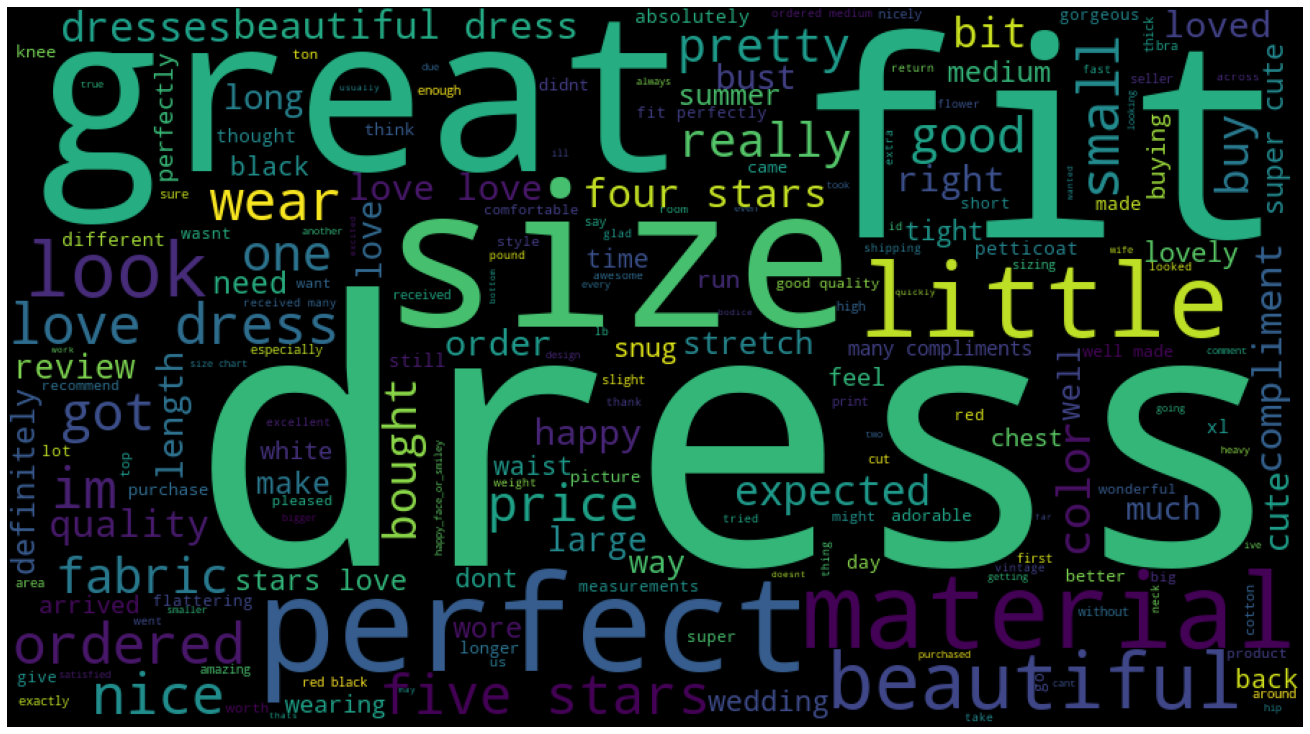

In [ ]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

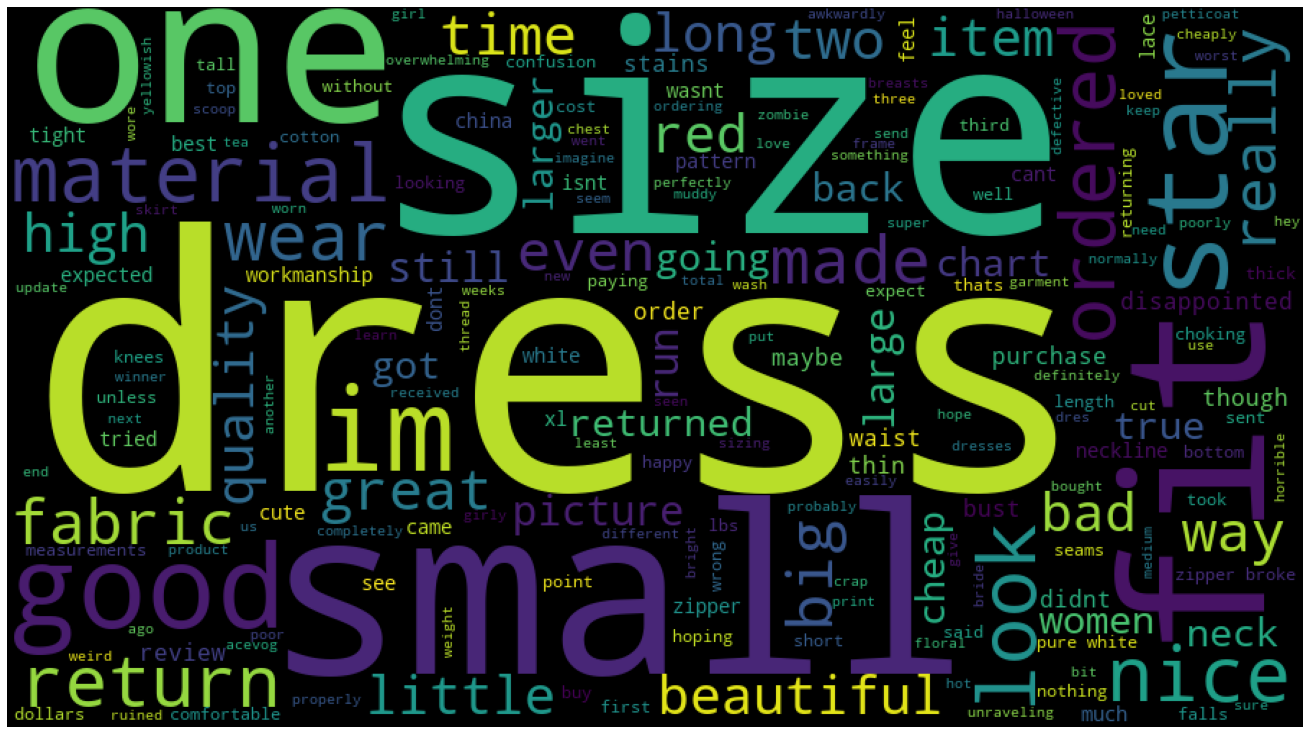

In [ ]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

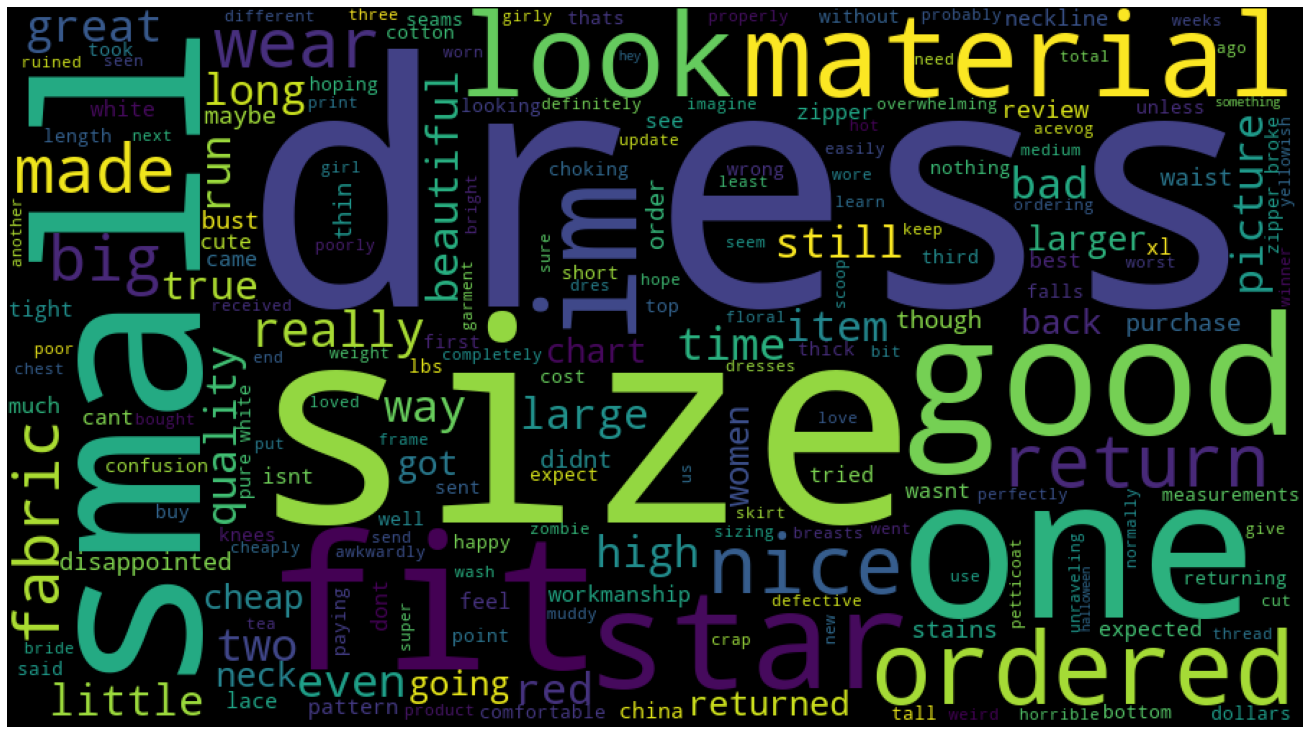

In [ ]:
#Visuallizing popular neutral words
plot_Cloud(neu_wordcloud)

#### Visualisations

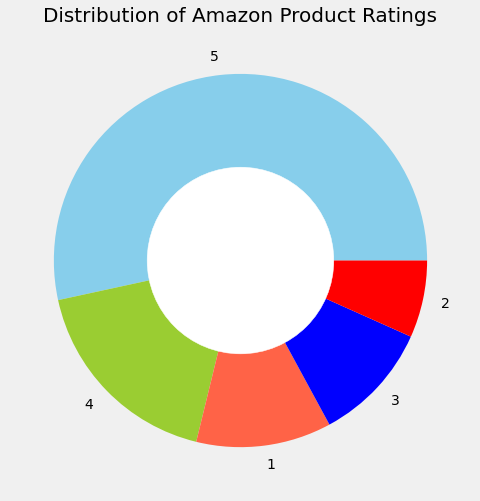

In [ ]:
# Distribution of Amazon Product Ratings

ratings = df["star_rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [ ]:
# reference for visuualisations: https://www.kaggle.com/roshansharma/amazon-alexa-reviews

In [ ]:
df.head(5)

,customer_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_body,review_date,sentiment
0,32158956,B01KL6O72Y,24485154,easy tool stainless steel fruit pineapple core...,4,0,0,0,1,really work great tweaking really work great b...,2013-01-14,Positive
1,2714559,B01ID3ZS5W,363128556,v women cowl neck knit stretchable elasticity ...,5,1,2,0,1,favorite winter warm love dress absolute favor...,2014-03-04,Positive
2,12608825,B01I497BGY,811958549,james fiallo men's -pairs low cut athletic spo...,5,0,0,0,1,great socks money nice socks great colors enou...,2015-07-12,Positive
3,25482800,B01HDXFZK6,692205728,belfry gangster % wool stain-resistant crushab...,5,0,0,0,1,slick hat bought husband wow slick hat high qu...,2015-06-03,Positive
4,9310286,B01G6MBEBY,431150422,jaeden women's beaded spaghetti straps sexy lo...,5,0,0,0,1,would perfect dress customer service awesome,2015-06-12,Positive


In [ ]:
# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

Text(0.5, 1.0, 'Distribution of Ratings for Apparel')

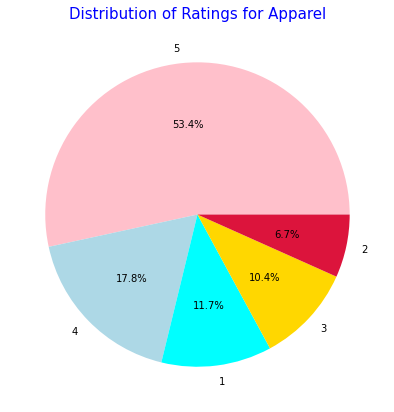

In [ ]:
# Distribution of ratings
ratings = df['star_rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values
colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Ratings for Apparel',color = 'blue',fontsize = 15)
# rating_piechart = go.Pie(labels = label_rating,values = size_rating,marker = dict(colors = colors),name = 'Apparel', hole = 1.0)
# df2 = [rating_piechart]
# layout = go.Layout(title = 'Distribution of Ratings for Apparel')
# fig = go.Figure(data = df2,layout = layout)
# py.iplot(fig)

In [ ]:
# Distribution of product_title
color = plt.cm.copper(np.linspace(0, 1, 15))
df['product_title'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Product Title', fontsize = 20)
plt.xlabel('product_title')
plt.ylabel('count')
plt.show()


Text(0.5, 1.0, 'Distribution of helpful votes')

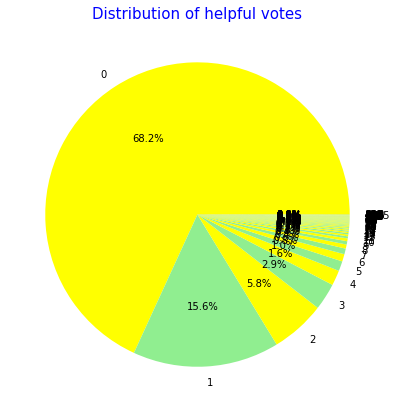

In [ ]:
# Distribution of helpful votes
helpfulVotes = df['helpful_votes'].value_counts()

label_feedback = helpfulVotes.index
size_feedback = helpfulVotes.values

colors = ['yellow', 'lightgreen']
# visual
plt.figure(figsize = (7,7))
plt.pie(size_feedback,  labels=label_feedback, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of helpful votes',color = 'blue',fontsize = 15)

# votes_piechart = go.Pie(labels = label_feedback,
#                          values = size_feedback,
#                          marker = dict(colors = colors),
#                          name = 'Apparel', hole = 0.3)
# df2 = [votes_piechart]
# layout = go.Layout(
#            title = 'Distribution of Helpful Votes for Apparel')
# fig = go.Figure(data = df2,
#                  layout = layout)
# py.iplot(fig)

In [ ]:
# Distribution in the length of the reviews
# df['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
# plt.title('Distribution of Length in Reviews')
# plt.xlabel('lengths')
# plt.ylabel('count')
# plt.show()

In [ ]:
# Check some of the reviews according to their lengths
# df[df['length'] == 1]['total_votes'].iloc[0]
# df[df['length'] == 21]['total_votes'].iloc[0]
# df[df['length'] == 50]['total_votes'].iloc[0]
# df[df['length'] == 150]['total_votes'].iloc[0]

In [ ]:
# Product title vs product rating - TAKING TIME
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('fivethirtyeight')

# sns.boxenplot(df['product_title'], df['star_rating'], palette = 'spring')
# plt.title("product_title vs star rating")
# plt.xticks(rotation = 90)
# plt.show()

In [ ]:
# product vs. length of rating
# plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('fivethirtyeight')

# sns.swarmplot(df['variation'], df['length'], palette = 'deep')
# plt.title("Variation vs Length of Ratings")
# plt.xticks(rotation = 90)
# plt.show()

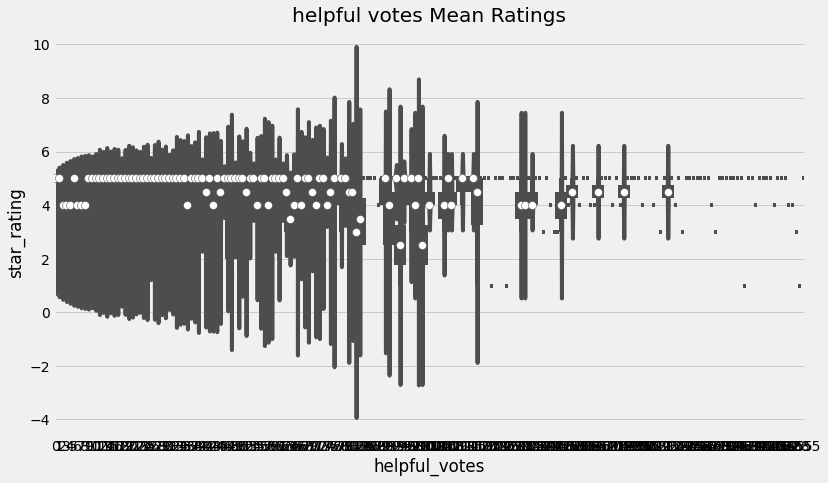

In [ ]:
# Helpful ratings vs. mean star rating
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(df['helpful_votes'], df['star_rating'], palette = 'cool')
plt.title("helpful votes Mean Ratings")
plt.show()

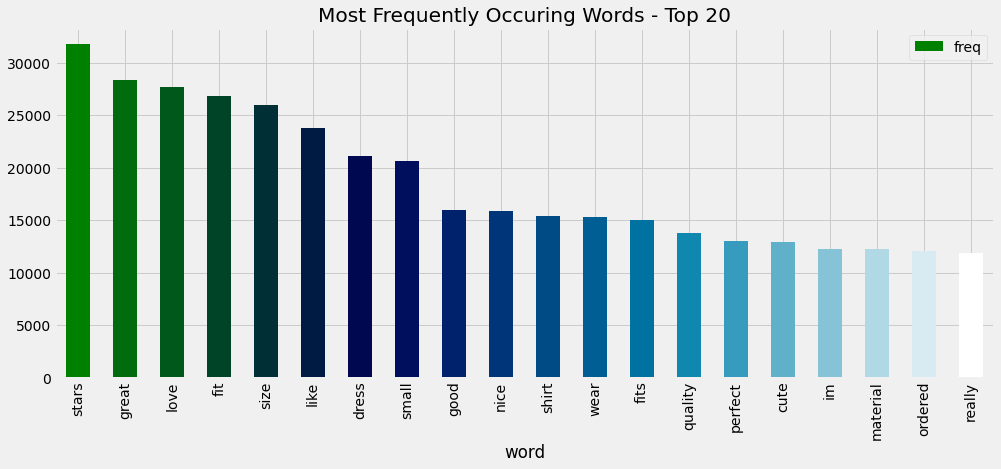

In [ ]:
# Most frequently occuring word - top 20
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.review_body)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

In [ ]:
# # total votes vs length - LENGTH WAS DROPPED
# import warnings
# warnings.filterwarnings('ignore')

# plt.rcParams['figure.figsize'] = (12, 7)
# plt.style.use('fivethirtyeight')

# sns.stripplot(df['total_votes'], df['length'], palette = 'Reds')
# plt.title("Votes vs Length")
# plt.show()

In [ ]:
# Rating vs. Length vs. product_title
# trace = go.Scatter3d(
#     x = df['length'],
#     y = df['star_rating'],
#     z = df['product_title'],
#     name = 'Apparel',
#     mode='markers',
#     marker=dict(
#         size=10,
#         color = df['star_rating'],
#         colorscale = 'Viridis',
#     )
# )
# df = [trace]

# layout = go.Layout(
#     title = 'Length vs Variation vs Ratings',
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0  
#     )
    
# )
# fig = go.Figure(data = df, layout = 
#                 layout)
# iplot(fig)

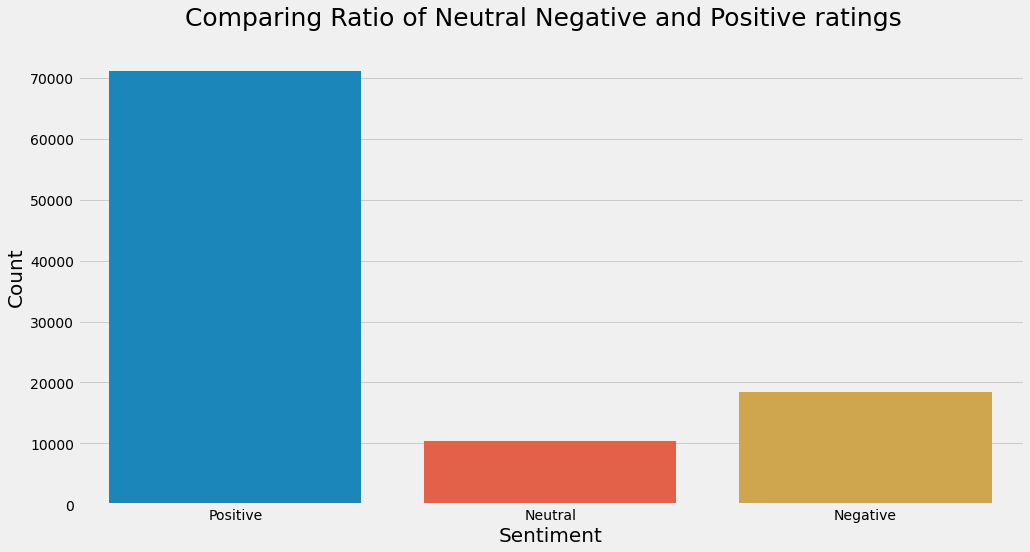

In [ ]:

# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "sentiment", data = df)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

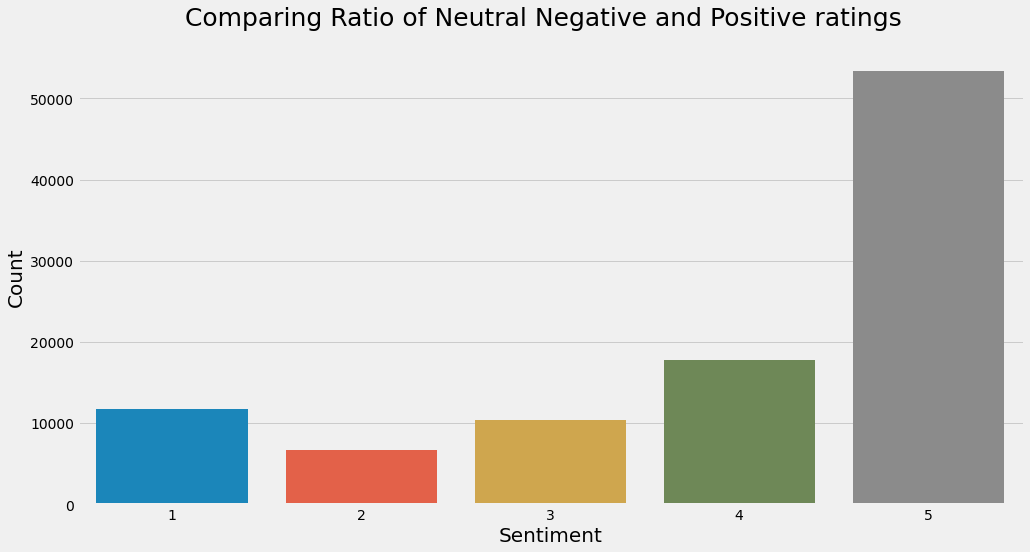

In [ ]:
# Distribution of the retaings
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "star_rating", data = df)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [ ]:
# Group by product and Rating class
df.groupby("product_title")["review_body"].unique()

In [ ]:
# Group by product and Rating class
df.groupby("product_title")["product_id"].count()

In [ ]:
# Group by product and Rating class
df.groupby("product_title")["sentiment"].unique()

In [ ]:
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

       customer_id  product_id  ... review_date sentiment
0         32158956  B01KL6O72Y  ...  2013-01-14  Positive
1          2714559  B01ID3ZS5W  ...  2014-03-04  Positive
2         12608825  B01I497BGY  ...  2015-07-12  Positive
3         25482800  B01HDXFZK6  ...  2015-06-03  Positive
4          9310286  B01G6MBEBY  ...  2015-06-12  Positive
...            ...         ...  ...         ...       ...
99939     43330569  B00VW37AMU  ...  2015-05-05  Positive
99940     25578439  B00VW367FG  ...  2015-05-18  Positive
99941      4282714  B00VW366V6  ...  2015-06-29  Positive
99942     41294636  B00VW2UKTG  ...  2015-08-06  Positive
99943     10624669  B00VW2TT0W  ...  2015-07-07  Positive

[99944 rows x 12 columns]


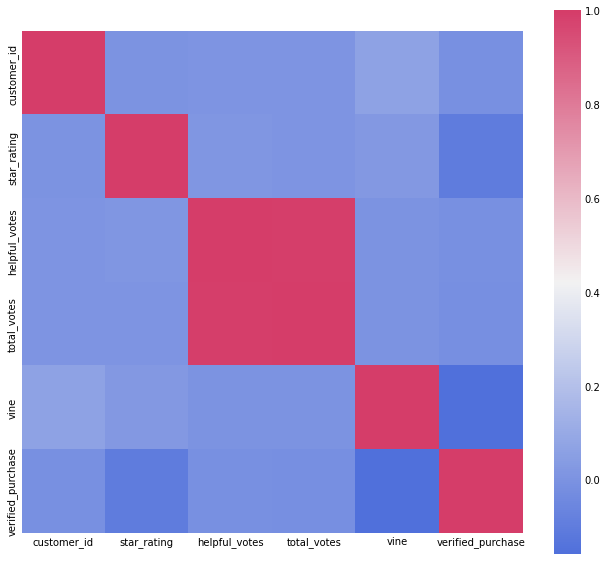

In [ ]:
import numpy as np
print(df)
# Leaving the text columns , finding the correlation between different features and their influence on score 
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99944 entries, 0 to 99943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        99944 non-null  int64 
 1   product_id         99944 non-null  object
 2   product_parent     99944 non-null  int64 
 3   product_title      99944 non-null  object
 4   star_rating        99944 non-null  int64 
 5   helpful_votes      99944 non-null  int64 
 6   total_votes        99944 non-null  int64 
 7   vine               99944 non-null  int64 
 8   verified_purchase  99944 non-null  int64 
 9   review_body        99944 non-null  object
 10  review_date        99944 non-null  object
dtypes: int64(7), object(4)
memory usage: 11.7+ MB


In [ ]:

# df=df['star_rating'].value_counts().to_frame()
avgdf1 = df.groupby('helpful_votes').agg({'star_rating': np.average})
avgdf2 = df.groupby('product_title').agg({'helpful_votes': np.average})
avgdf3 = df.groupby('star_rating').agg({'helpful_votes': np.average})

trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['star_rating'],2),
    marker=dict(
        color=avgdf1['star_rating'],
        colorscale = 'RdBu')
)

# trace2 = go.Bar(
#     x=df.index,
#     y=df.Rating,
#     marker=dict(
#         color=df1['star_rating'],
#         colorscale = 'RdBu')
# )

trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['helpful_votes'],2),
    marker=dict(
        color=avgdf2['helpful_votes'],
        colorscale = 'RdBu')
)

trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['helpful_votes'],2),
    marker=dict(
        color=avgdf3['helpful_votes'],
        colorscale = 'Reds')
)

fig = tools.make_subplots(rows=2, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
# fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='product_title')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='product_title')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='star_rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900,showlegend=False)
fig.update_layout({'plot_bgcolor':'rgba(0,0,0,0)',
                   'paper_bgcolor':'rgba(0,0,0,0)'})
#fig['layout'].update(plot_bgcolor='rgba(0,0,0,0)')
#fig['layout'].update(paper_bgcolor='rgba(0,0,0,0)')
py.iplot(fig)

In [ ]:
# # cv = df["product_title"].value_counts()

# trace = go.Scatter3d( x = avgdf1.index,
#                       y = avgdf1['star_rating'],
#                       z = cv[avgdf1.index],
#                       mode = 'markers',
#                       marker = dict(size=10,color=avgdf1['star_rating']),
#                       hoverinfo ="text",
#                       text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['star_rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
#                       )

# data = [trace]
# layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
#                    scene = dict(
#                     xaxis = dict(title='product_title'),
#                     yaxis = dict(title='Average Rating'),
#                     zaxis = dict(title='Number of Sales'),),
#                    margin = dict(l=30, r=30, b=30, t=30))
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)
# plt.savefig('3D_Scatter.png')

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

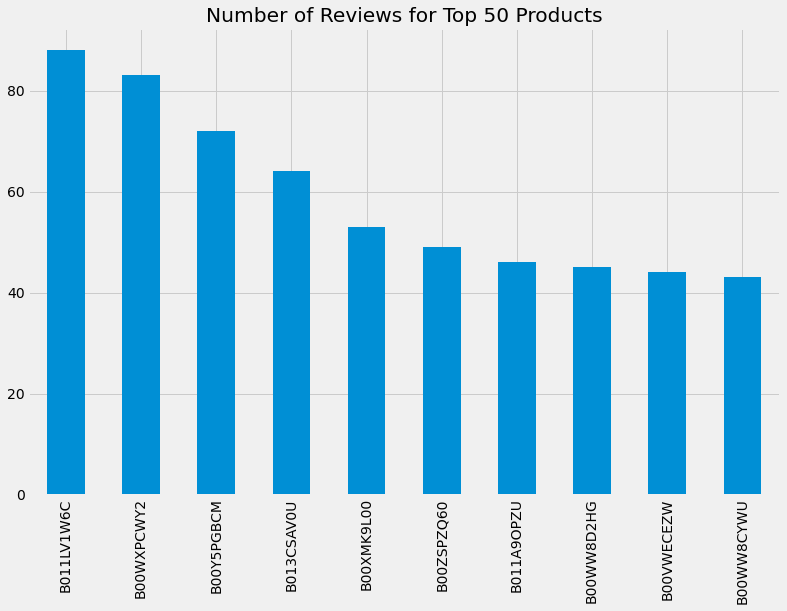

In [ ]:
# Plot number of reviews for top 50 products
products = df["product_id"].value_counts()
plt.figure(figsize=(12,8))
products[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

Text(0.5, 1.0, 'Number of Reviews for Top 50 Products')

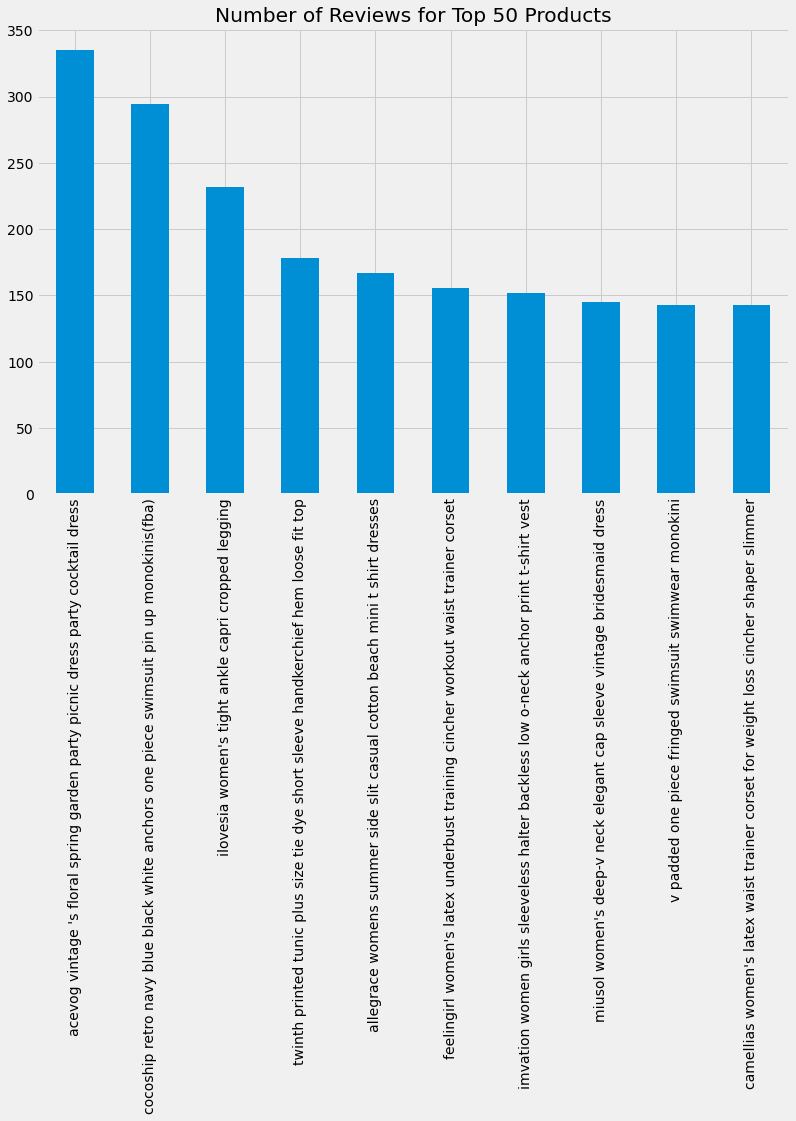

In [ ]:
# Plot number of reviews for top 50 products
products = df["product_title"].value_counts()
plt.figure(figsize=(12,8))
products[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")

In [ ]:
# Word Count per Review type
from textblob import TextBlob
df['text_word_count']= df.apply(lambda row: len(row['review_body']), axis=1)
# df["text_word_count"] = temp_df["Text"].apply(lambda text: len(text.split()))


In [ ]:
df[df.star_rating==5].text_word_count.median()

69.0

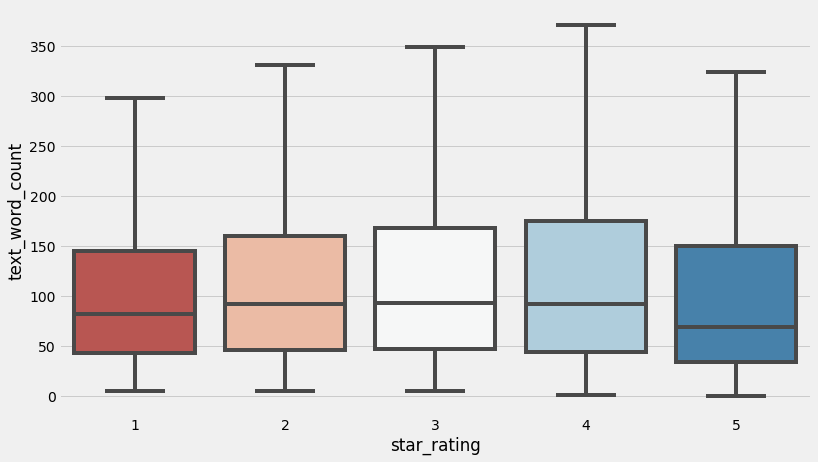

In [ ]:
sns.boxplot(x='star_rating',y='text_word_count', data=df, palette='RdBu', showfliers=False)
plt.show()

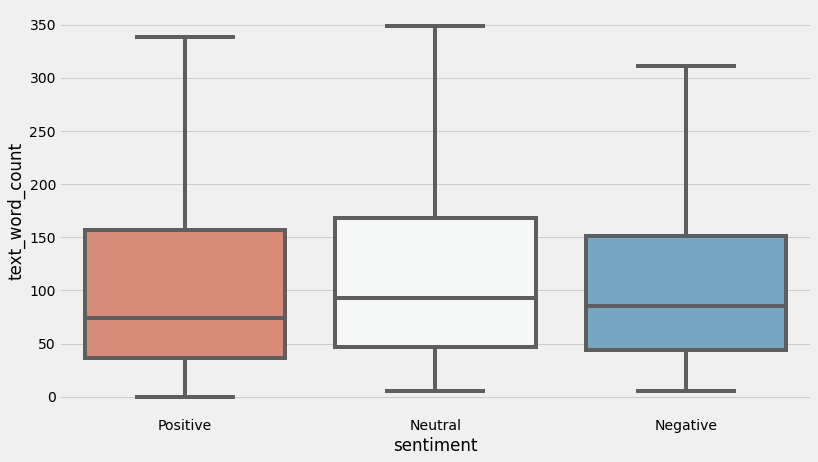

In [ ]:
sns.boxplot(x='sentiment',y='text_word_count', data=df, palette='RdBu', showfliers=False)
plt.show()

In [ ]:
# (6) Confirm data is ready with further exploratory analysis




*   Maximum reviews are positive
*   Product with Max reviews is Tummy slimming belt
*   This shows people mainly target losing weight :)
*   Postive reviews has lesser words compared to Neutral and negative. Neutral commets are ones with most words. Which can be critic comment or unsatisfied customers.





### Popular words in Review

In [ ]:
pos = df_discriptive.loc[df['classes'] == 'positive']
pos = pos[0:25000]

neg = df.loc[df['classes'] == 'negative']
neg = neg[0:25000]

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["review_body"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus
        


In [ ]:
# Generate a word cloud image
pos_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(pos))
neg_wordcloud = WordCloud(width=900, height=500).generate(create_Word_Corpus(neg))

In [ ]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
#Visuallizing popular positive words
plot_Cloud(pos_wordcloud)

In [ ]:
#Visuallizing popular negative words
plot_Cloud(neg_wordcloud)

### Feature Engineering

In [ ]:
# Feature Engineering
df_reviews = df[['review_body','star_rating']]
df_reviews.rename(columns = {'review_body':'feature','star_rating':'label'},inplace = True)
df_reviews.info()

# Normalize star ratings to be from 0 to 1 instead 1 to 5 ; for EDA and ML purposes
df_reviews_normalized = df_reviews
df_reviews_normalized['label'] = (df_reviews_normalized['label'] - df_reviews_normalized['label'].min()) / (df_reviews_normalized['label'].max() - df_reviews_normalized['label'].min())   
df_reviews_normalized 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99919 entries, 0 to 99918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  99919 non-null  object
 1   label    99919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


,feature,label
0,great socks for the money nice socks great col...,1.00
1,slick hat i bought this for my husband and wow...,1.00
2,i would do it again perfect dress and the cust...,1.00
3,love it raw is the only way to go absolutely l...,1.00
4,three stars a bit large,0.75
...,...,...
99914,five stars my girlfriend loved it,1.00
99915,four stars great shirt,0.75
99916,five stars sweet shirt,1.00
99917,five stars very well made,1.00


### Stemming the reviews

In [ ]:
#todo review
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
import re
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')

# Extracting 'reviews' for processing

print(df_reviews_normalized.head())

#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(df_reviews_normalized)):
    review = re.sub('[^a-zA-Z]', ' ', df_reviews_normalized['feature'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)   

corpus[2]


In [ ]:
print(corpus[1])
review_features.head(1)

### Data Split, Machine Learning

In [ ]:
# (7) Training, Testing (and/or Validation) data split 

# for example, 60/20/20

In [ ]:
# (7.b) If using Deep Learning, building the model

# Add Input Layer
# Add Hidden Layers
# Add Output

In [ ]:
# (8) Training the Machine Learning Model (i.e, Fitting the Model)

In [ ]:
# (9) Evaluate the model metrics for Training (and/or Validation) data

In [ ]:
# (10) Evaluate the model metris for Testing data


# If metrics are poor, optimize either (a) the data, (b) the hyperpamaters

In [ ]:
# (11) Use the model for prediction

In [ ]:
# (12) Write final predicted data  (e.g, to CSV or JSON, etc.)

In [ ]:
df_cleaned = df.head(100000)
df_cleaned['star_rating'].count()
df_cleaned['star_rating'].unique()
df_cleaned['star_rating'].value_counts()
# indexNames = df_cleaned[ df_cleaned['star_rating'] == 'star_rating' ].index
# df_cleaned.drop(indexNames,inplace=True)
# df_cleaned.dropna(inplace=True)

In [ ]:
from nltk.corpus import stopwords
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
df_cleaned.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df_cleaned['review_body'], df_cleaned['star_rating'], test_size=0.33, random_state=42)

In [ ]:
clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,C=0.1,random_state=40,solver='newton-cg')),
])
clf = clf.fit(X_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

In [ ]:
clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=500,C=0.1,random_state=40,solver='newton-cg')),
])
clf = clf.fit(X_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', DecisionTreeClassifier()),
])
clf = clf.fit(X_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

In [ ]:
clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf', DecisionTreeClassifier()),
])
clf = clf.fit(X_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

In [ ]:
from sklearn.svm import LinearSVC
clf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('clf',LinearSVC()),
])
clf = clf.fit(X_train, y_train)
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy on train %f' %accuracy_train)
print('Accuracy on test %f' %accuracy_test)

#### Using KNN

In [ ]:
def partition(x):
    if x<3:
        return 'Negative'
    elif x>3:
        return 'Positive'
    return 'Neutral'

actualScore = df['star_rating']
positiveNegative = actualScore.map(partition)
df['Score'] = positiveNegative

In [ ]:
df['Time'] = df['review_date']
sortedData = df.sort_values('product_id',axis=0,kind="quicksort", ascending=True)
final = sortedData.drop_duplicates(subset={"customer_id","Time","review_body"},keep="first",inplace=False)

final = final[final.helpful_votes >= final.total_votes-final.helpful_votes]

#As data is huge, due to computation limitation we will randomly select data. we will try to pick data in a way so that it doesn't make data imbalance problem
finalp = final[final.Score == 'Positive']
finalp = finalp.sample(frac=0.008,random_state=2) #0.055

finaln = final[final.Score == 'Negative']
finaln = finaln.sample(frac=0.1,random_state=1) #0.25

finalne = final[final.Score == 'Neutral']
finalne = finalne.sample(frac=0.02,random_state=4) #0.25

final = pd.concat([finalp,finaln, finalne],axis=0)

#sording data by timestamp so that it can be devided in train and test dataset for time based slicing.
final = final.sort_values('Time',axis=0,kind="quicksort", ascending=True).reset_index(drop=True)

In [ ]:
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
all_neutral_words=[]
s=''

for sent in final['review_body'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'Positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'Negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                    if(final['Score'].values)[i] == 'Neutral':
                        all_neutral_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) #final string of cleaned words    
    final_string.append(str1)
    i+=1

In [ ]:
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train,y_train, myList):
   
    #creating odd list of K for KNN
    #myList = list(range(0,40))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=8)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(list(filter(lambda x: x % 2 != 0, myList)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_k

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
count_vect = CountVectorizer() 
final_bow_count = count_vect.fit_transform(final_string)#final['Text'].values)

In [ ]:
from sklearn.preprocessing import StandardScaler

final_bow_np = StandardScaler(with_mean=False).fit_transform(final_bow_count )

In [ ]:
#We already have sorted data by timestamp so we will use first 70% of data as Train with cross validation and next 30% for test
import math
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = final_bow_np
y = final['Score']

X_train =  final_bow_np[:math.ceil(len(final)*.7)] 
X_test = final_bow_np[math.ceil(len(final)*.7):]
y_train = y[:math.ceil(len(final)*.7)]
y_test =  y[math.ceil(len(final)*.7):]

"""
df_test = pd.read_csv('test.csv')

df_test = df_test.dropna()

X_test = df_test['review_body']
y_test = df_test['ratings']

count_vect_test = CountVectorizer() 
final_bow_count_test = count_vect.fit_transform(X_test)
final_bow_np_test = StandardScaler(with_mean=False).fit_transform(final_bow_count_test)

X_test = final_bow_np_test
"""

In [ ]:
import numpy as np

In [ ]:
myList = list(range(0,15))

optimal_k = find_optimal_k(X_train ,y_train,myList)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, n_jobs=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
print("Accuracy for KNN model with Bag of words is ",round(accuracy_score(y_test ,pred),3))

#### EDA by Spacy

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
import string
punctuations = string.punctuation
from spacy.lang.en import English
parser = English()
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [word.lemma_.lower() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stopwords and word not in punctuations]
    return mytokens
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
#Custom Transformer using spaCy
class predictors(TransformerMixin):
    
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self,deep=True):
        return{}
    
# Basic function to clean the text
def clean_text(text):
    return text.strip().lower()
tfdifVect = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
from spacy import displacy

In [ ]:
# Breaking down a review into dependencies
doc = nlp(df['review_body'][8]) 
displacy.render(doc,style='dep',jupyter=True)

In [ ]:
#X = data.drop('star_rating',axis=1)
X = df['review_body']
y = df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

#### Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [ ]:
pipe = Pipeline([('cleaner', predictors()),
                 ('tfidfVect', tfdifVect),
                ('classifier',classifier),])

In [ ]:
y_train

In [ ]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()

In [ ]:
pipe = Pipeline([('cleaner', predictors()),
                 ('tfidfVect', tfdifVect),
                ('classifier',classifier),])

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
sample_prediction = pipe.predict(X_test)

In [ ]:
count = 1
for (sample,pred) in zip(X_test[0:10],sample_prediction[0:10]):
    print('\n',count,')')
    print(sample,"'PREDICTION':", pred)
    count += 1

In [ ]:
#Test Accuracy
print("Accuracy:", pipe.score(X_test,y_test))

In [ ]:
pipe.predict(["but fitting small and bad also costly and overpriced"])

In [ ]:
pipe.predict(["Not great"])

#### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier =  LogisticRegression()

In [ ]:
pipe = Pipeline([('cleaner', predictors()),
                ('tfidfVect', tfdifVect),
                ('classifier',classifier)])

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
sample_prediction = pipe.predict(X_test)

In [ ]:
#Test Accuracy
print("Accuracy:", pipe.score(X_test,y_test))

In [ ]:
pipe.predict(["but fitting small and bad also costly and overpriced"])

In [ ]:
pipe.predict(["Not great"])

#### Decision Trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([('cleaner', predictors()),
                ('tfidfVect', tfdifVect),
                ('classifier',classifier)])

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
sample_prediction = pipe.predict(X_test)

In [ ]:
print("Accuracy:", pipe.score(X_test,y_test))

In [ ]:
pipe.predict(["but fitting small and bad also costly and overpriced"])

In [ ]:
pipe.predict(["Not great"])

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
pipe = Pipeline([('cleaner', predictors()),
                ('tfidfVect', tfdifVect),
                ('classifier',classifier)])

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
sample_prediction = pipe.predict(X_test)

In [ ]:
print("Accuracy:", pipe.score(X_test,y_test))

In [ ]:
pipe.predict(["but fitting small and bad also costly and overpriced"])

In [ ]:
pipe.predict(["Not good"])

In [ ]:
pipe.predict(["Nice dress, good fitting"])

In [ ]:
pipe.predict(["perfect size, good material"])